# 🧑‍⚕️🔬🧪🧪Diabetes, Hypertension and Stroke Prediction 🧑‍⚕️🧑‍⚕️🔬🔬🧪🧪

# Install libraies dependencies

In [1]:
!pip install scikit-learn seaborn

# Importing Required libraies

In [2]:
import numpy as np  #linear algebra
import pandas as pd # a data processing and CSV I/O library
from pandas_profiling import ProfileReport
# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

# Reading Dataset(Exploring)

In [3]:
dia = pd.read_csv('../input/health-dataset/diabetes_data.csv')
hyp = pd.read_csv('../input/health-dataset/hypertension_data.csv')
str = pd.read_csv('../input/health-dataset/stroke_data.csv')

In [4]:
dia.head(10)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,1.0,18.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0
6,13.0,1.0,1.0,1.0,26.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,6.0,1.0,0.0,1.0,31.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
8,3.0,0.0,0.0,1.0,32.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
9,6.0,1.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,6.0,0.0,0.0,0.0,0.0


In [5]:
hyp.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,51.0,1.0,0,140,192,0,1,148,0,0.4,1,0,1,1
6,42.0,0.0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,38.0,0.0,1,120,263,0,1,173,0,0.0,2,0,3,1
8,72.0,0.0,2,172,199,1,1,162,0,0.5,2,0,3,1
9,47.0,0.0,2,150,168,0,1,174,0,1.6,2,0,2,1


In [6]:
str.head(10)

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1
5,1.0,55.0,1,1,1,4,0,70.09,27.4,0,1
6,0.0,82.0,0,0,0,4,1,94.39,22.8,0,1
7,0.0,17.0,1,0,1,4,0,80.43,29.7,0,1
8,1.0,31.0,0,1,1,2,0,120.46,36.8,1,1
9,0.0,55.0,0,0,1,4,1,104.51,27.3,1,1


In [7]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [8]:
hyp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26083 entries, 0 to 26082
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       26083 non-null  float64
 1   sex       26058 non-null  float64
 2   cp        26083 non-null  int64  
 3   trestbps  26083 non-null  int64  
 4   chol      26083 non-null  int64  
 5   fbs       26083 non-null  int64  
 6   restecg   26083 non-null  int64  
 7   thalach   26083 non-null  int64  
 8   exang     26083 non-null  int64  
 9   oldpeak   26083 non-null  float64
 10  slope     26083 non-null  int64  
 11  ca        26083 non-null  int64  
 12  thal      26083 non-null  int64  
 13  target    26083 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.8 MB


In [9]:
hyp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26083 entries, 0 to 26082
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       26083 non-null  float64
 1   sex       26058 non-null  float64
 2   cp        26083 non-null  int64  
 3   trestbps  26083 non-null  int64  
 4   chol      26083 non-null  int64  
 5   fbs       26083 non-null  int64  
 6   restecg   26083 non-null  int64  
 7   thalach   26083 non-null  int64  
 8   exang     26083 non-null  int64  
 9   oldpeak   26083 non-null  float64
 10  slope     26083 non-null  int64  
 11  ca        26083 non-null  int64  
 12  thal      26083 non-null  int64  
 13  target    26083 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.8 MB


In [10]:
dia.describe

<bound method NDFrame.describe of         Age  Sex  HighChol  CholCheck   BMI  Smoker  HeartDiseaseorAttack  \
0       4.0  1.0       0.0        1.0  26.0     0.0                   0.0   
1      12.0  1.0       1.0        1.0  26.0     1.0                   0.0   
2      13.0  1.0       0.0        1.0  26.0     0.0                   0.0   
3      11.0  1.0       1.0        1.0  28.0     1.0                   0.0   
4       8.0  0.0       0.0        1.0  29.0     1.0                   0.0   
...     ...  ...       ...        ...   ...     ...                   ...   
70687   6.0  0.0       1.0        1.0  37.0     0.0                   0.0   
70688  10.0  1.0       1.0        1.0  29.0     1.0                   1.0   
70689  13.0  0.0       1.0        1.0  25.0     0.0                   1.0   
70690  11.0  0.0       1.0        1.0  18.0     0.0                   0.0   
70691   9.0  0.0       1.0        1.0  25.0     0.0                   1.0   

       PhysActivity  Fruits  Veggies  Hvy

In [11]:
hyp.describe

<bound method NDFrame.describe of         age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      57.0  1.0   3       145   233    1        0      150      0      2.3   
1      64.0  0.0   2       130   250    0        1      187      0      3.5   
2      52.0  1.0   1       130   204    0        0      172      0      1.4   
3      56.0  0.0   1       120   236    0        1      178      0      0.8   
4      66.0  0.0   0       120   354    0        1      163      1      0.6   
...     ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
26078  72.0  0.0   0       138   294    1        1      106      0      1.9   
26079  60.0  1.0   0       144   200    0        0      126      1      0.9   
26080  68.0  1.0   0       100   234    0        1      156      0      0.1   
26081  67.0  1.0   1       154   232    0        0      164      0      0.0   
26082  67.0  0.0   1       130   236    0        0      174      0      0.0   

       slope  ca 

In [12]:
str.describe

<bound method NDFrame.describe of        sex   age  hypertension  heart_disease  ever_married  work_type  \
0      1.0  63.0             0              1             1          4   
1      1.0  42.0             0              1             1          4   
2      0.0  61.0             0              0             1          4   
3      1.0  41.0             1              0             1          3   
4      1.0  85.0             0              0             1          4   
...    ...   ...           ...            ...           ...        ...   
40905  1.0  38.0             0              0             0          4   
40906  0.0  53.0             0              0             1          4   
40907  1.0  32.0             0              0             1          2   
40908  1.0  42.0             0              0             1          3   
40909  1.0  35.0             0              0             0          4   

       Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0   

# 📊EDA

0.0    35346
1.0    35346
Name: Diabetes, dtype: int64


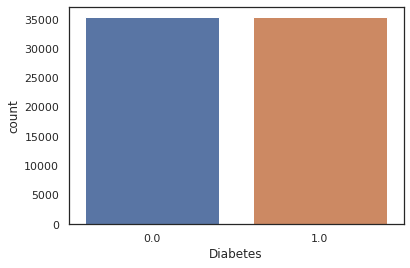

In [13]:
print(dia['Diabetes'].value_counts())
_ = sns.countplot(x='Diabetes', data=dia)

1    14274
0    11809
Name: target, dtype: int64


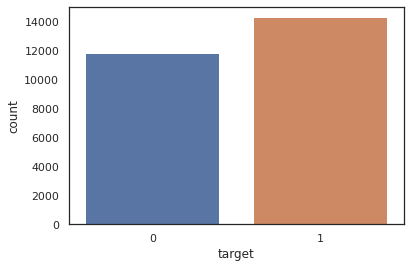

In [14]:
print(hyp['target'].value_counts())
_ = sns.countplot(x='target', data=hyp)

1    20460
0    20450
Name: stroke, dtype: int64


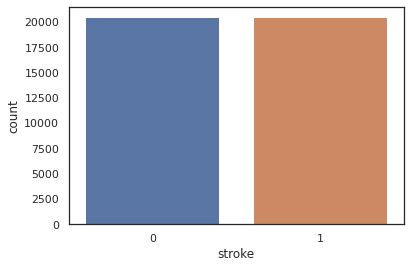

In [15]:
print(str['stroke'].value_counts())
_ = sns.countplot(x='stroke', data=str)

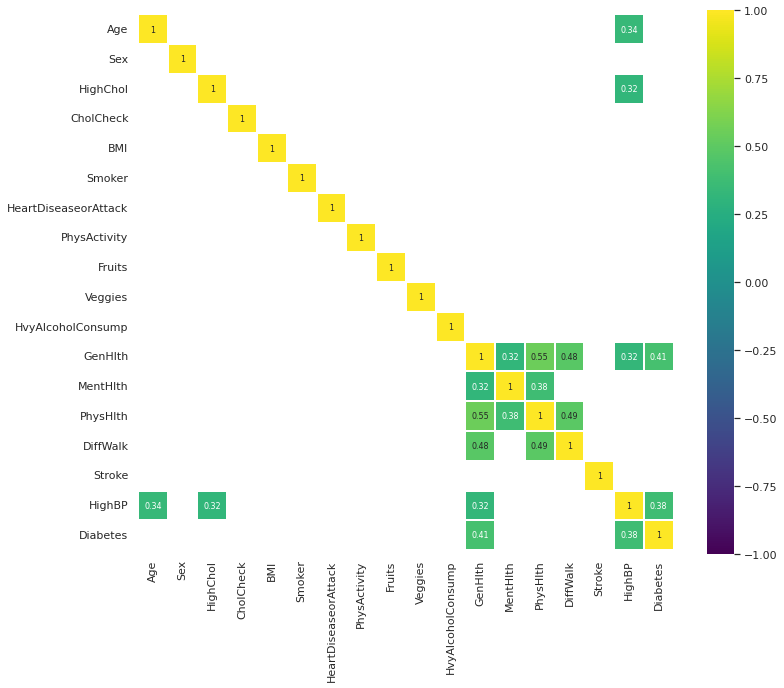

In [16]:
corr = dia.corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.3) | (corr <= -0.3)], cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,annot=True, annot_kws={"size": 8}, square=True);

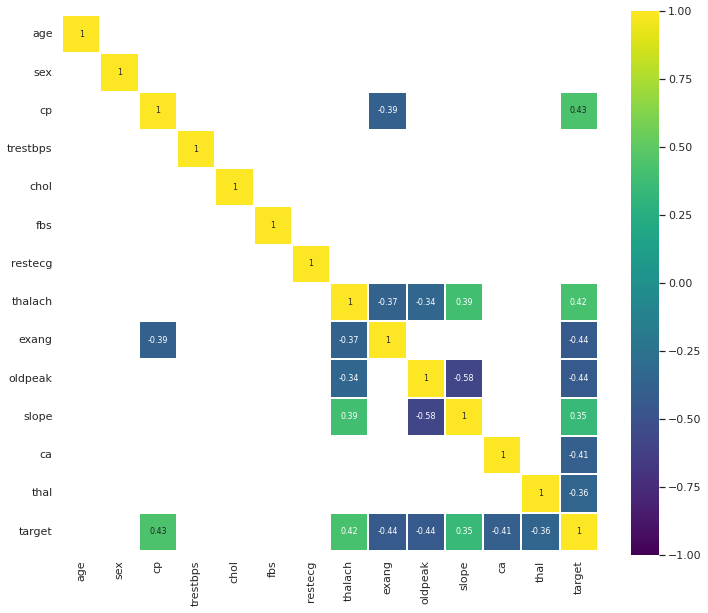

In [17]:
corr = hyp.corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.3) | (corr <= -0.3)], cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,annot=True, annot_kws={"size": 8}, square=True);

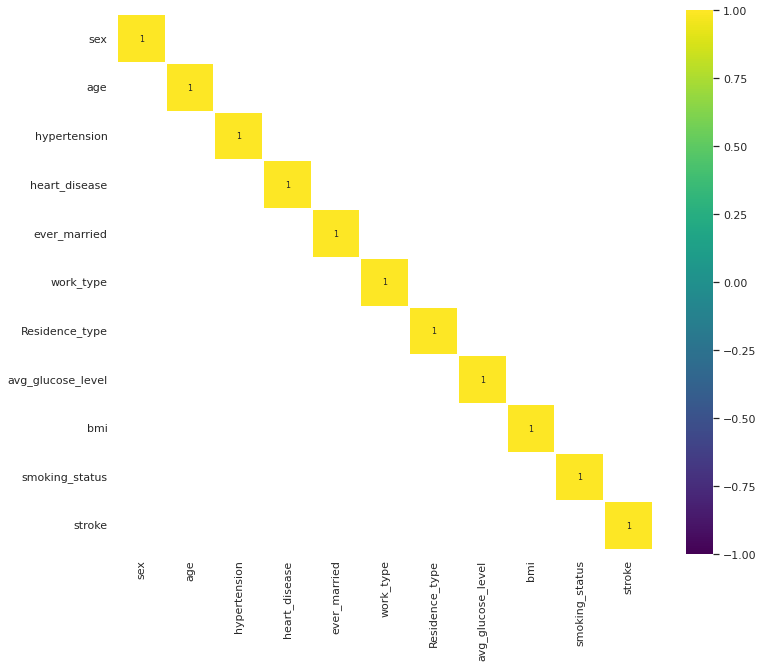

In [18]:
corr = str.corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.3) | (corr <= -0.3)], cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,annot=True, annot_kws={"size": 8}, square=True);

<AxesSubplot:>

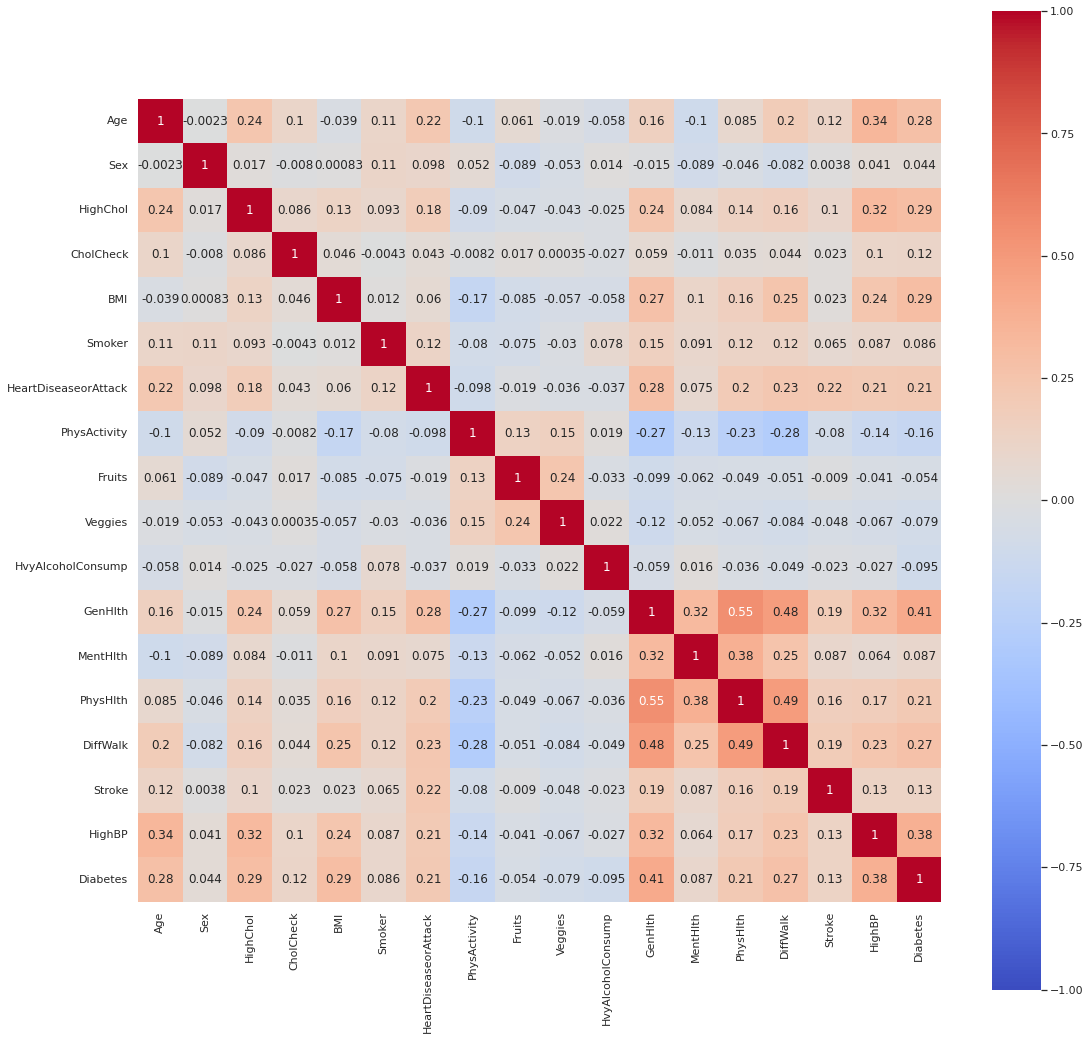

In [19]:
plt.figure(figsize=(18,18))
sns.heatmap(dia.corr("pearson"),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)

<AxesSubplot:>

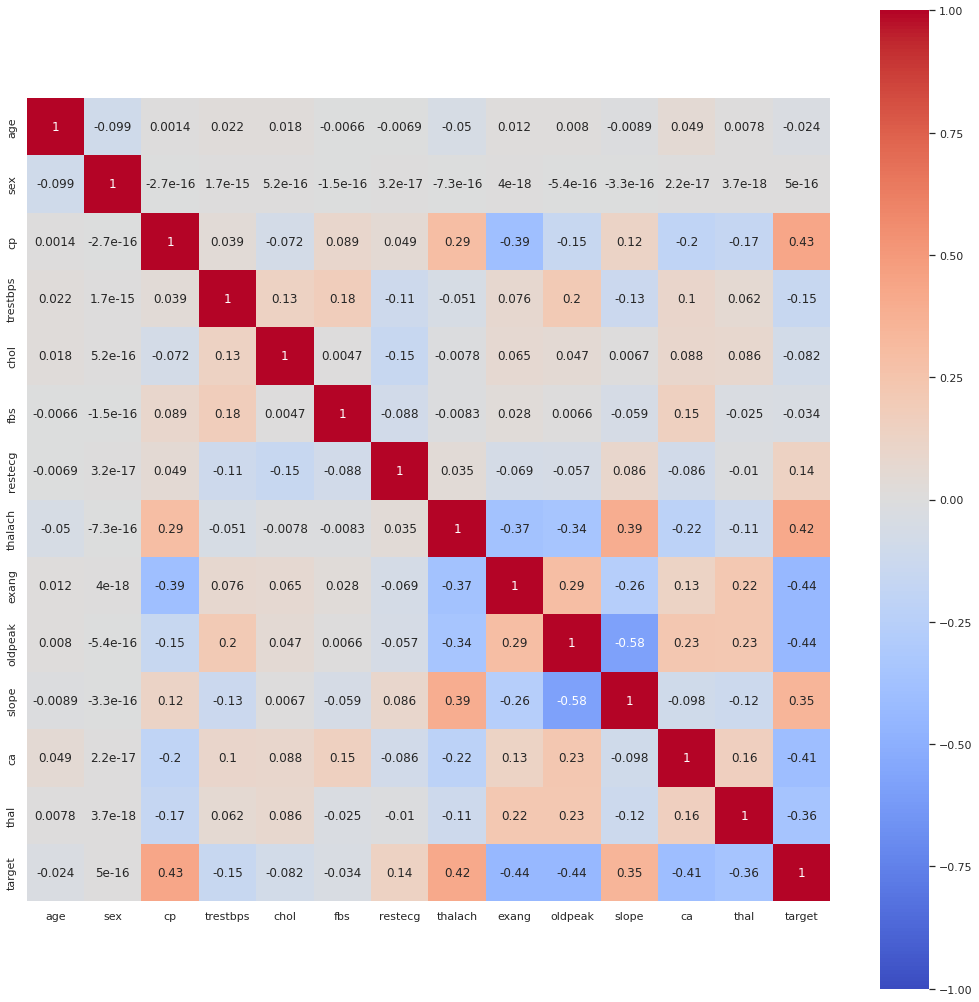

In [20]:
plt.figure(figsize=(18,18))
sns.heatmap(hyp.corr("pearson"),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)

<AxesSubplot:>

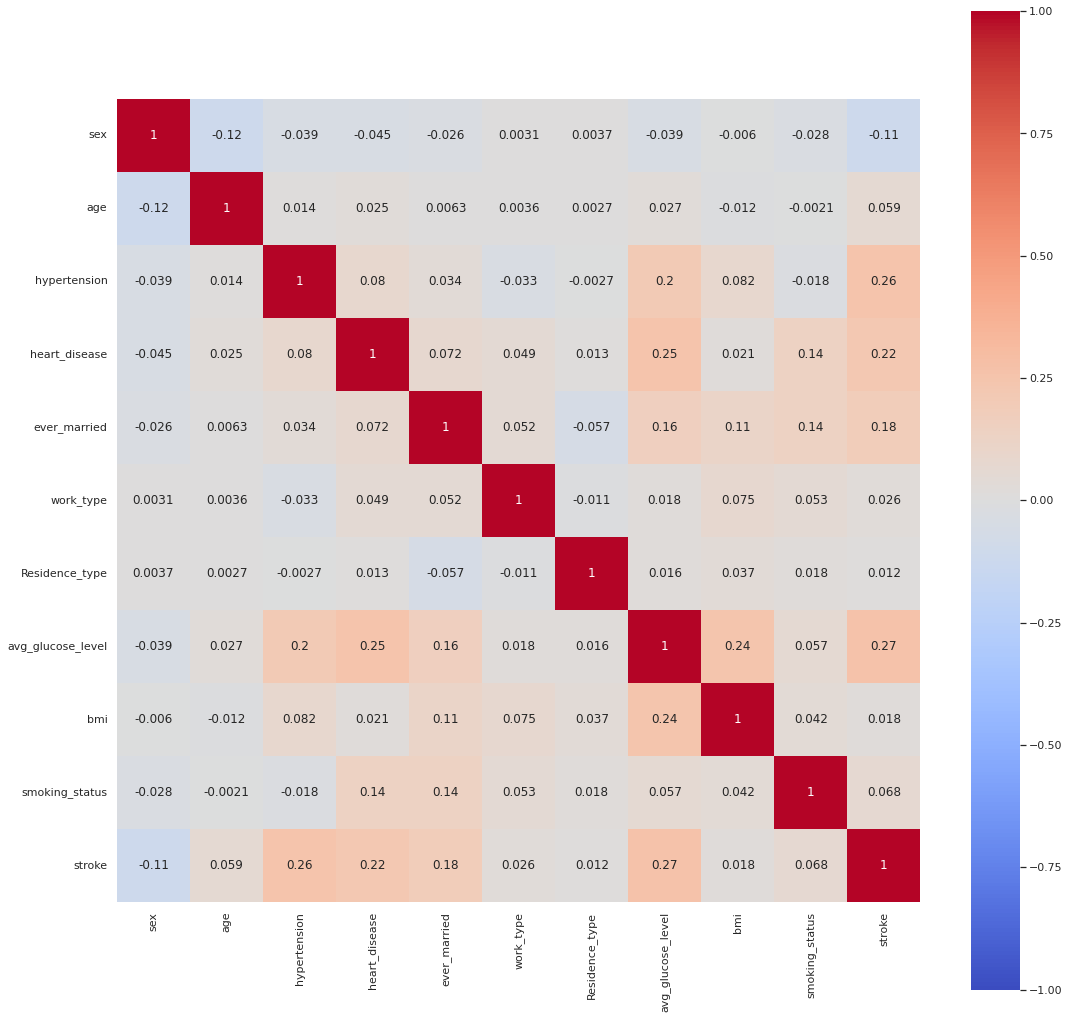

In [21]:
plt.figure(figsize=(18,18))
sns.heatmap(str.corr("pearson"),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)

# Preparing Dataset for ML model

In [22]:
dia = dia[np.isfinite(dia).all(1)]
hyp = hyp[np.isfinite(hyp).all(1)]
str = str[np.isfinite(str).all(1)]

# Defining X and y for Diabetes Dataset

In [23]:
X1 = dia.drop('Diabetes',axis=1)
y2 = dia[['Diabetes']]

# Importing Important Dependencies for ML

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score , classification_report, ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve

X_train , X_test , y_train , y_test = train_test_split(X1 , y2 , test_size=0.2,random_state=42)



# Deploying ML Models for Diabetes Dataset

In [25]:
models={
    "Logisitic Regression" :LogisticRegression(max_iter=20000),
    "Decision Tree" :DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Multinomial Naive Bayes": MultinomialNB()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train.values.ravel()) # Train Model
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred =  model.predict(X_test)

  # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) 
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') 
    model_test_precision = precision_score(y_test, y_test_pred , average='weighted') 
    model_test_recall  = recall_score(y_test, y_test_pred,average='weighted') 

  # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) 
    model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted') 
    model_train_precision = precision_score(y_train, y_train_pred,average='weighted') 
    model_train_recall = recall_score(y_train, y_train_pred,average='weighted') 

    print(list(models.keys())[i])

    print('Model performance for Training set (Diabetes)')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:4f}'.format(model_train_f1))
    print('- Precision: {:4f}'.format(model_train_precision))
    print('- Recall: {:4f}'.format(model_train_recall))

    print('----------------------------------')

    print('Model performance for Test set (Diabetes)')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy) )
    print('- Fl score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))


    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set (Diabetes)
- Accuracy: 0.7478
- F1 score: 0.747723
- Precision: 0.748228
- Recall: 0.747829
----------------------------------
Model performance for Test set (Diabetes)
- Accuracy: 0.7465
- Fl score: 0.7464
- Precision: 0.7471
- Recall: 0.7465


Decision Tree
Model performance for Training set (Diabetes)
- Accuracy: 0.9718
- F1 score: 0.971769
- Precision: 0.972464
- Recall: 0.971779
----------------------------------
Model performance for Test set (Diabetes)
- Accuracy: 0.6578
- Fl score: 0.6576
- Precision: 0.6579
- Recall: 0.6578


Random Forest
Model performance for Training set (Diabetes)
- Accuracy: 0.9718
- F1 score: 0.971761
- Precision: 0.971784
- Recall: 0.971761
----------------------------------
Model performance for Test set (Diabetes)
- Accuracy: 0.7251
- Fl score: 0.7247
- Precision: 0.7265
- Recall: 0.7251


K-Nearest Neighbors
Model performance for Training set (Diabetes)
- Accuracy: 0.8277
- F1 score: 0.827675
- 

# Defining X and y for Hypertension Dataset

In [26]:
X2 = hyp.drop('target',axis=1)
y2 = hyp[['target']]

In [27]:
X_train , X_test , y_train , y_test = train_test_split(X2 , y2 , test_size=0.2,random_state=42)

# Deploying ML Models for Hypertension Dataset

In [28]:
models={
    "Logisitic Regression" :LogisticRegression(max_iter=20000),
    "Decision Tree" :DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Multinomial Naive Bayes": MultinomialNB()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train.values.ravel()) # Train Model
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred =  model.predict(X_test)

  # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) 
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') 
    model_test_precision = precision_score(y_test, y_test_pred , average='weighted') 
    model_test_recall  = recall_score(y_test, y_test_pred,average='weighted') 

  # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) 
    model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted') 
    model_train_precision = precision_score(y_train, y_train_pred,average='weighted') 
    model_train_recall = recall_score(y_train, y_train_pred,average='weighted') 

    print(list(models.keys())[i])

    print('Model performance for Training set (Hypertension)')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:4f}'.format(model_train_f1))
    print('- Precision: {:4f}'.format(model_train_precision))
    print('- Recall: {:4f}'.format(model_train_recall))

    print('----------------------------------')

    print('Model performance for Test set (Hypertension)')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy) )
    print('- Fl score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))


    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set (Hypertension)
- Accuracy: 0.8576
- F1 score: 0.856328
- Precision: 0.860917
- Recall: 0.857575
----------------------------------
Model performance for Test set (Hypertension)
- Accuracy: 0.8565
- Fl score: 0.8553
- Precision: 0.8587
- Recall: 0.8565


Decision Tree
Model performance for Training set (Hypertension)
- Accuracy: 1.0000
- F1 score: 1.000000
- Precision: 1.000000
- Recall: 1.000000
----------------------------------
Model performance for Test set (Hypertension)
- Accuracy: 1.0000
- Fl score: 1.0000
- Precision: 1.0000
- Recall: 1.0000


Random Forest
Model performance for Training set (Hypertension)
- Accuracy: 1.0000
- F1 score: 1.000000
- Precision: 1.000000
- Recall: 1.000000
----------------------------------
Model performance for Test set (Hypertension)
- Accuracy: 1.0000
- Fl score: 1.0000
- Precision: 1.0000
- Recall: 1.0000


K-Nearest Neighbors
Model performance for Training set (Hypertension)
- Accuracy: 1.

# Defining X and y for Strokes Dataset

In [29]:
X = str.drop('stroke',axis=1).values
y = str[['stroke']]

In [30]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2,random_state=42)

# Deploying ML Models for Strokes Dataset

In [31]:
models={
    "Logisitic Regression" :LogisticRegression(max_iter=20000),
    "Decision Tree" :DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train.values.ravel()) # Train Model
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred =  model.predict(X_test)

  # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) 
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') 
    model_test_precision = precision_score(y_test, y_test_pred , average='weighted') 
    model_test_recall  = recall_score(y_test, y_test_pred,average='weighted') 

  # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) 
    model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted') 
    model_train_precision = precision_score(y_train, y_train_pred,average='weighted') 
    model_train_recall = recall_score(y_train, y_train_pred,average='weighted') 

    print(list(models.keys())[i])

    print('Model performance for Training set (Strokes)')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:4f}'.format(model_train_f1))
    print('- Precision: {:4f}'.format(model_train_precision))
    print('- Recall: {:4f}'.format(model_train_recall))

    print('----------------------------------')

    print('Model performance for Test set (Strokes)')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy) )
    print('- Fl score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))


    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set (Strokes)
- Accuracy: 0.6837
- F1 score: 0.682349
- Precision: 0.687131
- Recall: 0.683728
----------------------------------
Model performance for Test set (Strokes)
- Accuracy: 0.6821
- Fl score: 0.6807
- Precision: 0.6850
- Recall: 0.6821


Decision Tree
Model performance for Training set (Strokes)
- Accuracy: 1.0000
- F1 score: 1.000000
- Precision: 1.000000
- Recall: 1.000000
----------------------------------
Model performance for Test set (Strokes)
- Accuracy: 0.9994
- Fl score: 0.9994
- Precision: 0.9994
- Recall: 0.9994


Random Forest
Model performance for Training set (Strokes)
- Accuracy: 1.0000
- F1 score: 1.000000
- Precision: 1.000000
- Recall: 1.000000
----------------------------------
Model performance for Test set (Strokes)
- Accuracy: 0.9974
- Fl score: 0.9974
- Precision: 0.9974
- Recall: 0.9974


K-Nearest Neighbors
Model performance for Training set (Strokes)
- Accuracy: 0.9228
- F1 score: 0.922435
- Precisi